#### A job contains multiple tasks, different tasks executes different computing logics. Tasks form a DAG according to the data dependency. Instance is the smallest scheduling unit of batch workload. All instances within a task execute exactly the same binary with the same resource request, but with different input data.

In [1]:
import numpy as np
import pandas as pd 

In [2]:
bt = pd.read_csv("D:/Files/2019 Spring/High P Com/Project/trace_201708/trace_201708/batch_task.csv") 
bi = pd.read_csv("D:/Files/2019 Spring/High P Com/Project/trace_201708/trace_201708/batch_instance.csv")

In [3]:
bt.head()

,create_timestamp,modify_timestamp,job_id,task_id,instance_num,status,plan_cpu,plan_mem
0,6459,6524,3,4,15740,Terminated,50.0,0.007957
1,6457,6533,3,5,1,Terminated,50.0,0.004395
2,6036,6046,4,7,393,Waiting,NaN,NaN
3,6036,6046,4,6,452,Waiting,NaN,NaN
4,10719,11332,15,67,1705,Terminated,50.0,0.005736


In [4]:
bi.head()

,start_timestamp,end_timestamp,job_id,task_id,machineID,status,seq_no,total_seq_no,real_cpu_max,real_cpu_avg,...,120,686,299,Terminated,1,1.1,1.5,0.29,Unnamed: 20,Unnamed: 21
0,41561,41619.0,120.0,686.0,1279.0,Terminated,1.0,1.0,0.89,0.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41562,41617.0,120.0,686.0,828.0,Terminated,1.0,1.0,0.94,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41561,41617.0,120.0,686.0,95.0,Terminated,1.0,1.0,1.00,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41557,41610.0,120.0,686.0,545.0,Terminated,1.0,1.0,1.37,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41557,41614.0,120.0,686.0,258.0,Terminated,1.0,1.0,1.18,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bt_job_id = np.sort(bt.job_id)
bt_job_id

array([    1,     2,     2, ..., 12951, 12951, 12951], dtype=int64)

In [7]:
bi_status = bi.status.to_string

In [23]:
bt_task_id = np.sort(bt.task_id)
bt_task_id

array([    1,     2,     3, ..., 80551, 80552, 80553], dtype=int64)

In [6]:
bt_job_id[:20]

array([1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int64)

In [7]:
bt_task_pre_job = {}
bt_task_pre_job = pd.value_counts(bt_job_id)

In [8]:
max(bt_task_pre_job)

156

In [9]:
min(bt_task_pre_job)

1

In [10]:
sum(bt_task_pre_job) / len(bt_task_pre_job)

6.219828584665277

In [15]:
first_task_pre_job_createtime = {}
for i in range(1,12951):
    first_task_pre_job_createtime[i] = min(bt[bt.job_id == i].create_timestamp) 
        

In [12]:
task_createtime = np.sort(bt.create_timestamp)
task_createtime

array([-1078, -1078, -1078, ..., 59763, 59798, 60181], dtype=int64)

In [21]:
last_task_pre_job_endtime = {}
for i in range(1,12951):
    last_task_pre_job_endtime[i] = max(bi[bi.job_id == i].end_timestamp)

In [36]:
exutime_pre_job = {}
for i in range(1,12951):
        exutime_pre_job[i] = abs(last_task_pre_job_endtime[i] - first_task_pre_job_createtime[i])

In [37]:
max(exutime_pre_job)

12950

In [38]:
min(exutime_pre_job)

1

In [39]:
sum(exutime_pre_job) / len(exutime_pre_job)

6475.5

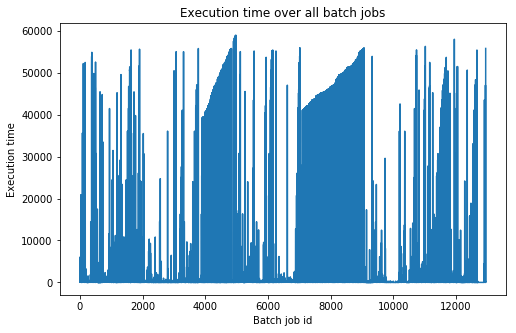

In [40]:
import os.path
import matplotlib.pyplot as plt
plt.figure(figsize=[8,5])

#plot execution time over all batch jobs
lists = sorted(exutime_pre_job.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
time = [z for z in y]
job_id = [z for z in x]
plt.plot(job_id, time, label="execution time over all batch jobs")
plt.title("Execution time over all batch jobs")
plt.ylabel("Execution time")
plt.xlabel("Batch job id")
#job_id = list(range(0,14))
#labels = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000]
#plt.xticks(range(0,14,2), labels) 
directory = "D:/Files/2019 Spring/High P Com/Project/HPC_project/figures/"
filename = os.path.join(directory, 'batch_job_execution_time.png')
plt.savefig(filename, dpi=300)
plt.show()

In [18]:
first_task_pre_job_starttime = {}
for i in range(1,12951):
    first_task_pre_job_starttime[i] = min(bi[bi.job_id == i].start_timestamp)

In [37]:
first_task_pre_job_startrun = {}
for i in range(1, 12951):
    first_task_pre_job_startrun[i] = min(bi[bi[bi.job_id == i].status == 'Running'].start_timestamp)
first_task_pre_job_startrun

C:\CS\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
last_task_pre_job_stoprun = {}
for i in range(1, 12951):
    last_task_pre_job_stoprun[i] = max(bi[(bi.job_id == i) && (bi.status == 'Running')].end_timestamp)
last_task_pre_job_stoprun

In [20]:
min(runtime_pre_job)

1

In [21]:
max(runtime_pre_job)

12950

In [22]:
sum(runtime_pre_job) / len(runtime_pre_job)

6475.5